In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import analysis
import scipy.optimize as sco

In [2]:
sd = dt.datetime(2010,1,1)
ed = dt.datetime(2010,12,31)
syms = ['GOOG', 'AAPL', 'GLD', 'XOM']
allocs = [0.2, 0.3, 0.4, 0.1]
sv=1000000
rfr=0.0
sf=252.0

Start Date: 2010-01-01 00:00:00
End Date: 2010-12-31 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [0.2, 0.3, 0.4, 0.1]
Sharpe Ratio: 1.5182709346
Volatility (stdev of daily returns): 0.0100103389009
Average Daily Return: 0.000957409623442
Cumulative Return: 0.255660718066


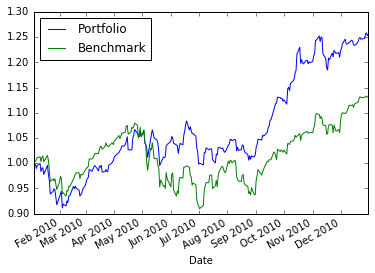

In [3]:
params = analysis.assess_portfolio(sd, ed, syms, allocs, sv, rfr=0.0, sf=252.0, gen_plot=True)

In [4]:
sd = dt.datetime(2010,1,1)
ed = dt.datetime(2010,12,31)
syms = ['AXP', 'HPQ', 'IBM', 'HNZ']
allocs = [0.0, 0.0, 0.0, 1.0]

Start Date: 2010-01-01 00:00:00
End Date: 2010-12-31 00:00:00
Symbols: ['AXP', 'HPQ', 'IBM', 'HNZ']
Allocations: [0.0, 0.0, 0.0, 1.0]
Sharpe Ratio: 1.45258472317
Volatility (stdev of daily returns): 0.00930522510523
Average Daily Return: 0.000851467519328
Cumulative Return: 0.22483215628


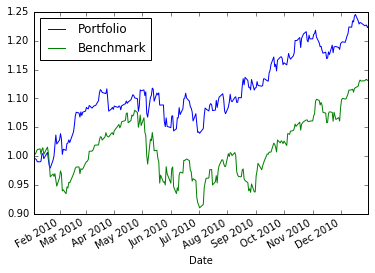

In [5]:
params = analysis.assess_portfolio(sd, ed, syms, allocs, sv, rfr=0.0, sf=252.0, gen_plot=True)

Start Date: 2010-01-01

End Date: 2010-12-31

Symbols: ['AXP', 'HPQ', 'IBM', 'HNZ']

Allocations: [0.0, 0.0, 0.0, 1.0]

Sharpe Ratio: 1.30798398744

Volatility (stdev of daily returns): 0.00926153128768

Average Daily Return: 0.000763106152672

Cumulative Return: 0.198105963655

In [6]:
sd = dt.datetime(2010,6,1)
ed = dt.datetime(2010,12,31)
syms = ['GOOG', 'AAPL', 'GLD', 'XOM']
allocs = [0.2, 0.3, 0.4, 0.1]

Start Date: 2010-06-01 00:00:00
End Date: 2010-12-31 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [0.2, 0.3, 0.4, 0.1]
Sharpe Ratio: 2.21244151417
Volatility (stdev of daily returns): 0.00929718541692
Average Daily Return: 0.00129575538054
Cumulative Return: 0.205093813842


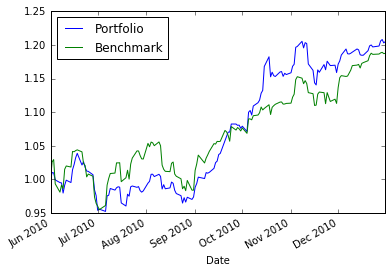

In [7]:
params = analysis.assess_portfolio(sd, ed, syms, allocs, sv, rfr=0.0, sf=252.0, gen_plot=True)

Start Date: 2010-06-01

End Date: 2010-12-31

Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']

Allocations: [0.2, 0.3, 0.4, 0.1]

Sharpe Ratio: 2.21259766672

Volatility (stdev of daily returns): 0.00929734619707

Average Daily Return: 0.00129586924366

Cumulative Return: 0.205113938792

In [41]:
def min_func_sharpe(allocations):
    port_data = (portfolio_values / portfolio_values.ix[0]) * allocations
    port_data['Portfolio'] = port_data.sum(axis=1)
    df_returns = port_data['Portfolio'] - risk_free
    mean = df_returns.mean()
    std = df_returns.std()
    K = np.sqrt(sample_freq)
    neg_sharpe_ratio = mean / std * K
    return -neg_sharpe_ratio


def optimize_portfolio(sd, ed, syms, gen_plot):
    asset_count = len(syms)
    cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    bnds = tuple((0, 1) for x in range(asset_count))

    opts = sco.minimize(min_func_sharpe, asset_count * [1. / asset_count,], bounds=bnds, constraints=cons)

    print opts['x'].round(3)
    
    port_val = analysis.allocate_data(portfolio_values, opts['x'], start_val)
    spy = analysis.get_data(sd, ed, ['SPY'])
    spy = analysis.allocate_data(spy, [1.0], start_val)
    
    cr, adr, sddr, sr = analysis.compute_portfolio_stats(port_val, risk_free, sample_freq)
    ev = port_val['Portfolio'][-1]
    
    print "Start Date:", sd
    print "End Date:", ed
    print "Symbols:", syms
    print "Allocations:", opts['x'].round(3)
    print "Sharpe Ratio:", sr.round(3)
    print "Volatility (stdev of daily returns):", sddr
    print "Average Daily Return:", adr
    print "Cumulative Return:", cr
    
    if gen_plot:
        analysis.plot_returns(port_val, spy)
    
    return opts, cr, adr, sddr, sr

[ 0.     0.     0.336  0.664]
Start Date: 2010-01-01 00:00:00
End Date: 2010-12-31 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [ 0.     0.     0.336  0.664]
Sharpe Ratio: 1.062
Volatility (stdev of daily returns): 0.0086523269009
Average Daily Return: 0.000578985613202
Cumulative Return: 0.145600750287


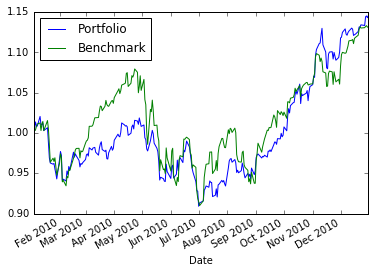

In [44]:
sd = dt.datetime(2010,1,1)
ed = dt.datetime(2010,12,31)
syms = ['GOOG', 'AAPL', 'GLD', 'XOM']

portfolio_values = analysis.get_data(sd, ed, syms)
risk_free = 0.0
sample_freq = 252.0
start_val=1000000

params = optimize_portfolio(sd, ed, syms, gen_plot=True)

[ 0.     0.07   0.127  0.803]
Start Date: 2004-01-01 00:00:00
End Date: 2006-01-01 00:00:00
Symbols: ['AXP', 'HPQ', 'IBM', 'HNZ']
Allocations: [ 0.     0.07   0.127  0.803]
Sharpe Ratio: 0.119
Volatility (stdev of daily returns): 0.00776534708528
Average Daily Return: 5.8131645273e-05
Cumulative Return: 0.0142154516774


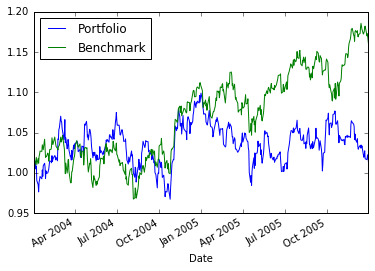

In [45]:
sd = dt.datetime(2004,1,1)
ed = dt.datetime(2006,1,1)
syms = ['AXP', 'HPQ', 'IBM', 'HNZ']

portfolio_values = analysis.get_data(sd, ed, syms)
risk_free = 0.0
sample_freq = 252.0
start_val=1000000

params = optimize_portfolio(sd, ed, syms, gen_plot=True)

In [84]:
def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights)
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov(), weights)))
    return np.array([pret, pvol, pret / pvol])
    
def min_func_sharpe(weights):
    return -statistics(weights)[2]

sd = dt.datetime(2010,1,1)
ed = dt.datetime(2010,12,31)
syms = ['GOOG', 'AAPL', 'GLD', 'XOM']

#sd = dt.datetime(2004,1,1)
#ed = dt.datetime(2006,1,1)
#syms = ['AXP', 'HPQ', 'IBM', 'HNZ']

data = analysis.get_data(sd, ed, syms)
risk_free = 0.0
sample_freq = 252.0
start_val=1000000

rets = data.pct_change().dropna()

asset_count = len(syms)
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(asset_count))

opts = sco.minimize(min_func_sharpe, asset_count * [1. / asset_count,], bounds=bnds, constraints=cons)

weights = opts['x']
adr = np.sum(rets.mean() * weights)
sddr = np.sqrt(np.dot(weights.T, np.dot(rets.cov(), weights)))
allocated = data * weights
allocated['Portfolio'] =  allocated.sum(axis=1)
cum_return = allocated['Portfolio'][-1] / allocated['Portfolio'][0] - 1
sr = adr / sddr * np.sqrt(252.)

print "Start Date:", sd
print "End Date:", ed
print "Symbols:", syms
print "Allocations:", opts['x'].round(3)
print "Sharpe Ratio:", sr.round(3)
print "Volatility (stdev of daily returns):", sddr
print "Average Daily Return:", adr
print "Cumulative Return:", cum_return

Start Date: 2010-01-01 00:00:00
End Date: 2010-12-31 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [ 0.    0.42  0.58  0.  ]
Sharpe Ratio: 2.058
Volatility (stdev of daily returns): 0.0101653921671
Average Daily Return: 0.00131808384096
Cumulative Return: 0.30119870225


In [81]:
def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights)
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov(), weights)))
    return np.array([pret, pvol, pret / pvol])
    
def min_func_sharpe(weights):
    return -statistics(weights)[2]

def optimize_portfolio(sd, ed, syms, gen_plot):
    data = analysis.get_data(sd, ed, syms)
    risk_free = 0.0
    sample_freq = 252.0
    start_val=1000000

    rets = data.pct_change().dropna()

    asset_count = len(syms)
    cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    bnds = tuple((0, 1) for x in range(asset_count))

    opts = sco.minimize(min_func_sharpe, asset_count * [1. / asset_count,], bounds=bnds, constraints=cons)
    
    weights = opts['x']

    adr = np.sum(rets.mean() * weights)
    sddr = np.sqrt(np.dot(weights.T, np.dot(rets.cov(), weights)))
    allocated = data * weights
    allocated['Portfolio'] =  allocated.sum(axis=1)
    cum_return = allocated['Portfolio'][-1] / allocated['Portfolio'][0] - 1
    sr = adr / sddr * np.sqrt(252.)
    
    spy = analysis.get_data(sd, ed, ['SPY'])
    spy = analysis.allocate_data(spy, [1.0], start_val)
    
    #cr, adr, sddr, sr = analysis.compute_portfolio_stats(port_val, risk_free, sample_freq)
    #ev = port_val['Portfolio'][-1]
    
    print "Start Date:", sd
    print "End Date:", ed
    print "Symbols:", syms
    print "Allocations:", opts['x'].round(3)
    print "Sharpe Ratio:", sr.round(3)
    print "Volatility (stdev of daily returns):", sddr
    print "Average Daily Return:", adr
    print "Cumulative Return:", cum_return
    
    if gen_plot:
        analysis.plot_returns(allocated, spy)
    
    return weights, cum_return, adr, sddr, sr

Start Date: 2004-01-01 00:00:00
End Date: 2006-01-01 00:00:00
Symbols: ['AXP', 'HPQ', 'IBM', 'HNZ']
Allocations: [ 0.    0.42  0.58  0.  ]
Sharpe Ratio: 0.281
Volatility (stdev of daily returns): 0.0106514265741
Average Daily Return: 0.000188344325613
Cumulative Return: -0.0584005914063


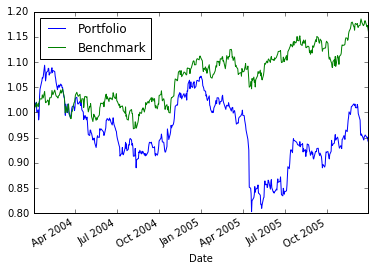

In [82]:
params = optimize_portfolio(sd, ed, syms, gen_plot=True)

Start Date: 2004-01-01 00:00:00
End Date: 2006-01-01 00:00:00
Symbols: ['AXP', 'HPQ', 'IBM', 'HNZ']
Allocations: [ 0.    0.42  0.58  0.  ]
Sharpe Ratio: 0.281
Volatility (stdev of daily returns): 0.0106514265741
Average Daily Return: 0.000188344325613
Cumulative Return: -0.0584005914063


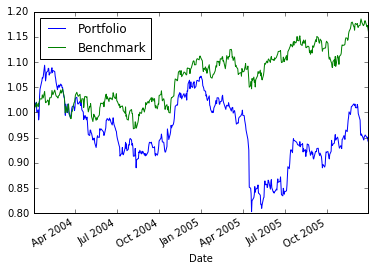

In [83]:
sd = dt.datetime(2004,1,1)
ed = dt.datetime(2006,1,1)
syms = ['AXP', 'HPQ', 'IBM', 'HNZ']

params = optimize_portfolio(sd, ed, syms, gen_plot=True)